In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error
warnings.filterwarnings("ignore")

In [2]:
d= pd.read_csv(r'D:\internfolder\Customerchurn.csv')
d

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
d.shape

(7043, 21)

In [4]:
d.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
d.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
d.drop(["customerID"],axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
d.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
d.TotalCharges = pd.to_numeric(d.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [10]:
d[pd.to_numeric(d.TotalCharges,errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
d= d[d.TotalCharges!=' ']

In [12]:
d.shape

(7032, 21)

In [13]:
d.TotalCharges = pd.to_numeric(d.TotalCharges)

In [14]:
d.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

# visualization

In [15]:
d=d.drop(["customerID"],axis=1)

In [16]:
d.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [17]:
d.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

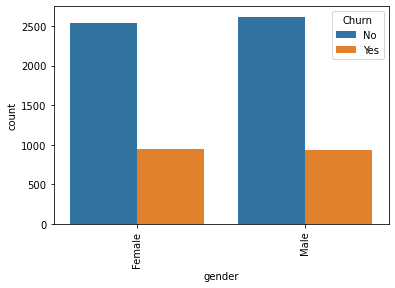

In [18]:
sns.countplot(x='gender',hue= "Churn",data=d)

plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'DSL'), Text(1, 0, 'Fiber optic'), Text(2, 0, 'No')])

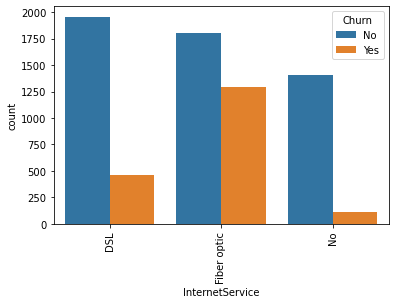

In [19]:
sns.countplot(x='InternetService',hue= "Churn",data=d)

plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'No phone service'), Text(1, 0, 'No'), Text(2, 0, 'Yes')])

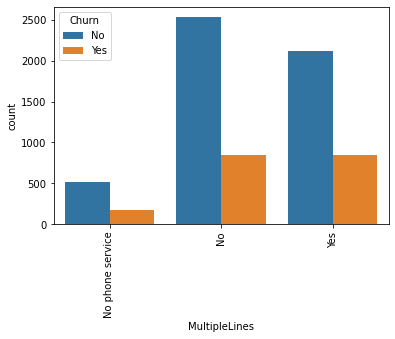

In [20]:
sns.countplot(x='MultipleLines',hue= "Churn",data=d)

plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

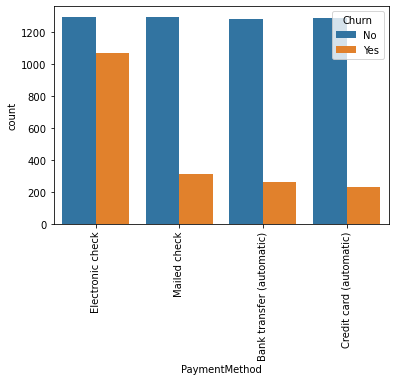

In [21]:

sns.countplot(x='PaymentMethod',hue= "Churn",data=d)

plt.xticks(rotation=90)

In [22]:
def print_unique_col_values(d):
       for column in d:
            if d[column].dtypes=='object':
                print(f'{column}: {d[column].unique()}')

print_unique_col_values(d)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [23]:
d['gender'].replace({'Female':1,'Male':0},inplace=True)
d["MultipleLines"].replace('No phone service','No',inplace=True)
d["InternetService"].replace('DSL','Yes',inplace=True)
d["InternetService"].replace('Fiber optic','Yes',inplace=True)
d["OnlineSecurity"].replace('No internet service','No',inplace=True)
d["OnlineBackup"].replace('No internet service','No',inplace=True)
d["DeviceProtection"].replace('No internet service','No',inplace=True)
d["TechSupport"].replace('No internet service','No',inplace=True)
d["StreamingMovies"].replace('No internet service','No',inplace=True)
d["StreamingTV"].replace('No internet service','No',inplace=True)



In [24]:
def print_unique_col_values(d):
       for column in d:
            if d[column].dtypes=='object':
                print(f'{column}: {d[column].unique()}')

print_unique_col_values(d)

Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['Yes' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [25]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','InternetService',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    d[col].replace({'Yes': 1,'No': 0},inplace=True)

In [26]:
d.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [27]:
Contract = d[["Contract"]]

Contract = pd.get_dummies(Contract, drop_first= True)

Contract.head()

,Contract_One year,Contract_Two year
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [28]:
PaymentMethod = d[["PaymentMethod"]]

PaymentMethod = pd.get_dummies(PaymentMethod, drop_first= True)

PaymentMethod.head()

,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,1,0


In [29]:
d = pd.concat([d, Contract, PaymentMethod], axis = 1)

In [30]:
d.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,1,0,1,...,1,Electronic check,29.85,29.85,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,1,0,...,0,Mailed check,56.95,1889.50,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,1,...,1,Mailed check,53.85,108.15,1,0,0,0,0,1
3,0,0,0,0,45,0,0,1,1,0,...,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0
4,1,0,0,0,2,1,0,1,0,0,...,1,Electronic check,70.70,151.65,1,0,0,0,1,0


In [31]:
d=d.drop(["PaymentMethod","Contract"],axis=1)
d.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,1,0,1,...,0,1,29.85,29.85,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,1,0,...,0,0,56.95,1889.50,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,1,...,0,1,53.85,108.15,1,0,0,0,0,1
3,0,0,0,0,45,0,0,1,1,0,...,0,0,42.30,1840.75,0,1,0,0,0,0
4,1,0,0,0,2,1,0,1,0,0,...,0,1,70.70,151.65,1,0,0,0,1,0


In [32]:
d.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.783845,0.286547,0.344852,...,0.388367,0.592719,64.798208,2283.300441,0.265785,0.209329,0.239619,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.411650,0.452180,0.475354,...,0.487414,0.491363,30.085974,2266.771362,0.441782,0.406858,0.426881,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,89.862500,3794.737500,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
d.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,0.001819,0.001379,-0.010349,-0.005285,0.007515,0.008883,0.004745,0.016328,0.013093,...,0.010105,0.011902,0.013779,-0.000048,0.008545,-0.007755,0.003603,-0.001632,-0.000844,-0.013199
SeniorCitizen,0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,0.182519,-0.038576,0.066663,...,0.119842,0.156258,0.219874,0.102411,0.150541,-0.046491,-0.116205,-0.024359,0.171322,-0.152987
Partner,0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.000286,0.143346,0.141849,...,0.118108,-0.013957,0.097825,0.319072,-0.149982,0.083067,0.247334,0.082327,-0.083207,-0.096948
Dependents,-0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,-0.138383,0.080786,0.023639,...,-0.038375,-0.110131,-0.112343,0.064653,-0.163128,0.069222,0.201699,0.061134,-0.149274,0.056448
tenure,-0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.037529,0.328297,0.361138,...,0.285402,0.004823,0.246862,0.825880,-0.354049,0.202338,0.563801,0.232800,-0.210197,-0.232181
PhoneService,0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.171817,-0.091676,-0.052133,...,-0.033477,0.016696,0.248033,0.113008,0.011691,-0.003142,0.004442,-0.006916,0.002747,-0.004463
MultipleLines,0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.210794,0.098592,0.202228,...,0.259194,0.163746,0.490912,0.469042,0.040033,-0.003594,0.106618,0.060319,0.083583,-0.227672
InternetService,0.004745,0.182519,0.000286,-0.138383,0.037529,-0.171817,0.210794,1.000000,0.332799,0.380990,...,0.418450,0.320592,0.763191,0.374878,0.227578,-0.038061,-0.217542,-0.001870,0.284608,-0.319694
OnlineSecurity,0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,0.332799,1.000000,0.283285,...,0.187426,-0.004051,0.296447,0.412619,-0.171270,0.100658,0.191698,0.115473,-0.112295,-0.079918
OnlineBackup,0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.380990,0.283285,1.000000,...,0.274523,0.127056,0.441529,0.510100,-0.082307,0.084113,0.111391,0.090455,-0.000364,-0.174075


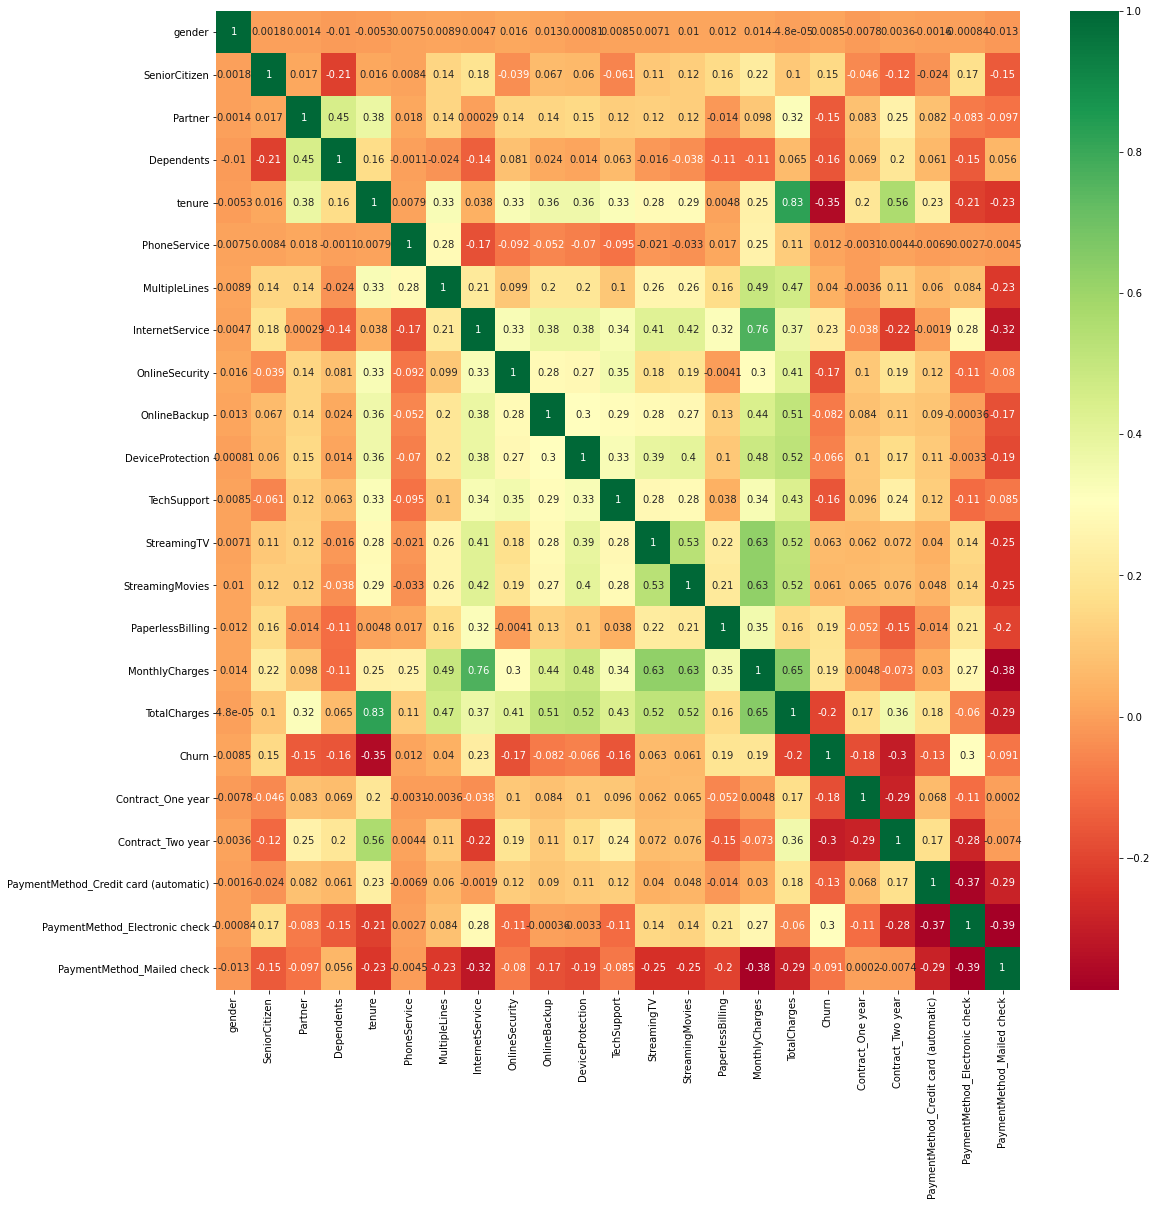

In [34]:
plt.figure(figsize = (18,18))
sns.heatmap(d.corr(), annot = True, cmap = "RdYlGn")

plt.show()

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>],
       [<AxesSubplot:title={'center':'Dependents'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'PhoneService'}>],
       [<AxesSubplot:title={'center':'MultipleLines'}>,
        <AxesSubplot:title={'center':'InternetService'}>,
        <AxesSubplot:title={'center':'OnlineSecurity'}>],
       [<AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>,
        <AxesSubplot:title={'center':'TechSupport'}>],
       [<AxesSubplot:title={'center':'StreamingTV'}>,
        <AxesSubplot:title={'center':'StreamingMovies'}>,
        <AxesSubplot:title={'center':'PaperlessBilling'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>,
        <AxesSubplot:title={'center':'Churn'}>],
       [<Axe

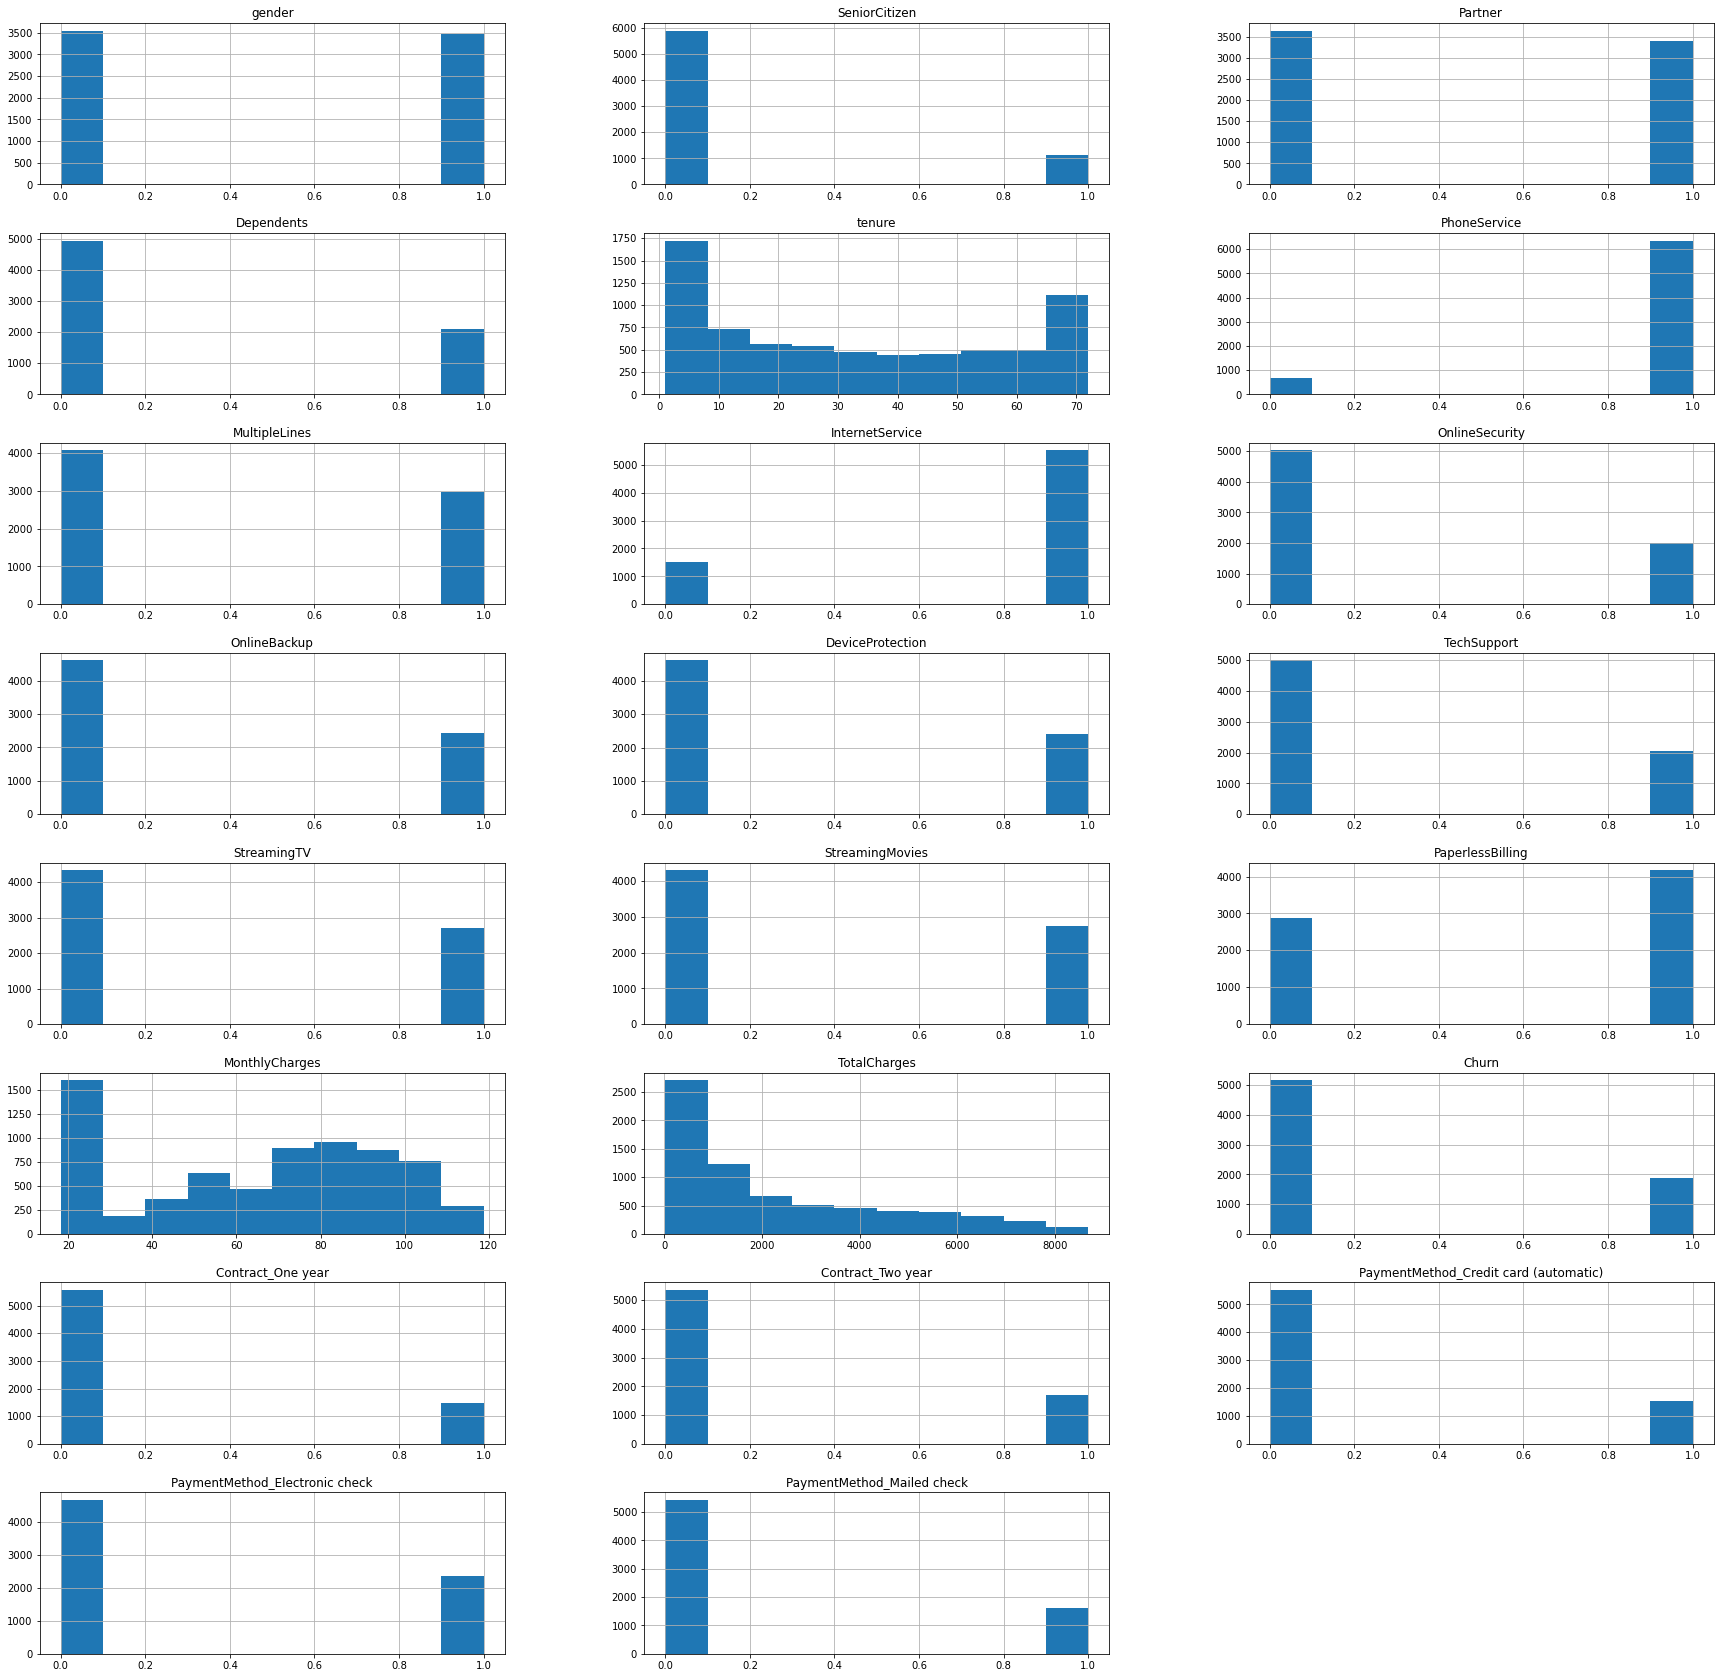

In [35]:
d.hist(figsize=(30,30), layout=(8,3), sharex=False)

# Plotting and checking outliers

In [36]:
d.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,1,0,1,...,0,1,29.85,29.85,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,1,0,...,0,0,56.95,1889.50,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,1,...,0,1,53.85,108.15,1,0,0,0,0,1
3,0,0,0,0,45,0,0,1,1,0,...,0,0,42.30,1840.75,0,1,0,0,0,0
4,1,0,0,0,2,1,0,1,0,0,...,0,1,70.70,151.65,1,0,0,0,1,0


<AxesSubplot:>

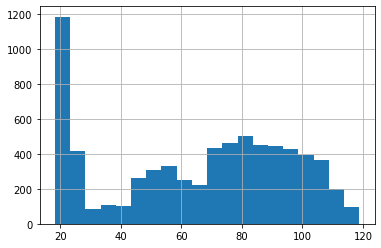

In [37]:
d['MonthlyCharges'].hist(bins=20)

In [38]:
d['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

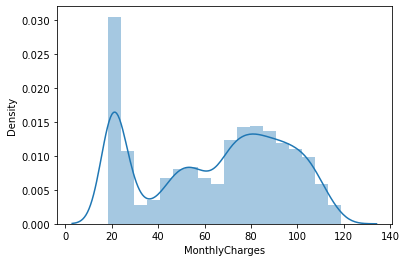

In [39]:
sns.distplot(d['MonthlyCharges'])

In [40]:
per75=89.8625
per25=35.5875
iqr=per75-per25
iqr

54.275

In [41]:
upperlimit=per75+1.5*iqr
lowerlimit=per25-1.5*iqr
d['MonthlyCharges']=d[d['MonthlyCharges']<upperlimit]
d['MonthlyCharges']=d[d['MonthlyCharges']>lowerlimit]


In [42]:
d['MonthlyCharges']

0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    1.0
7040    1.0
7041    0.0
7042    0.0
Name: MonthlyCharges, Length: 7032, dtype: float64

In [43]:
d.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,1,0,1,...,0,1,1.0,29.85,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,1,0,...,0,0,0.0,1889.50,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,1,...,0,1,0.0,108.15,1,0,0,0,0,1
3,0,0,0,0,45,0,0,1,1,0,...,0,0,0.0,1840.75,0,1,0,0,0,0
4,1,0,0,0,2,1,0,1,0,0,...,0,1,1.0,151.65,1,0,0,0,1,0


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

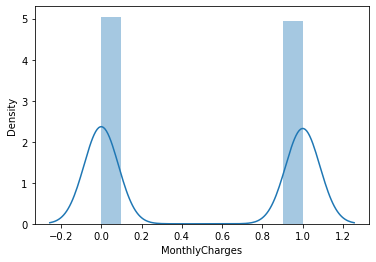

In [44]:
sns.distplot(d['MonthlyCharges'])

<AxesSubplot:>

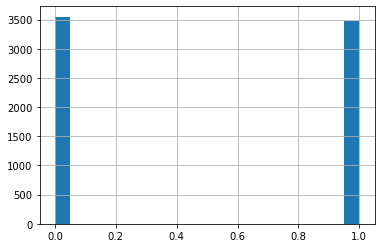

In [45]:
d['MonthlyCharges'].hist(bins=20)

gender                                      AxesSubplot(0.125,0.787927;0.133621x0.0920732)
SeniorCitizen                            AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
Partner                                   AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
Dependents                               AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
tenure                                   AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
PhoneService                                AxesSubplot(0.125,0.677439;0.133621x0.0920732)
MultipleLines                            AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
InternetService                           AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
OnlineSecurity                           AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
OnlineBackup                             AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
DeviceProtection                            AxesSubplot(0.125,0.566951;0.133621x0.0920732)

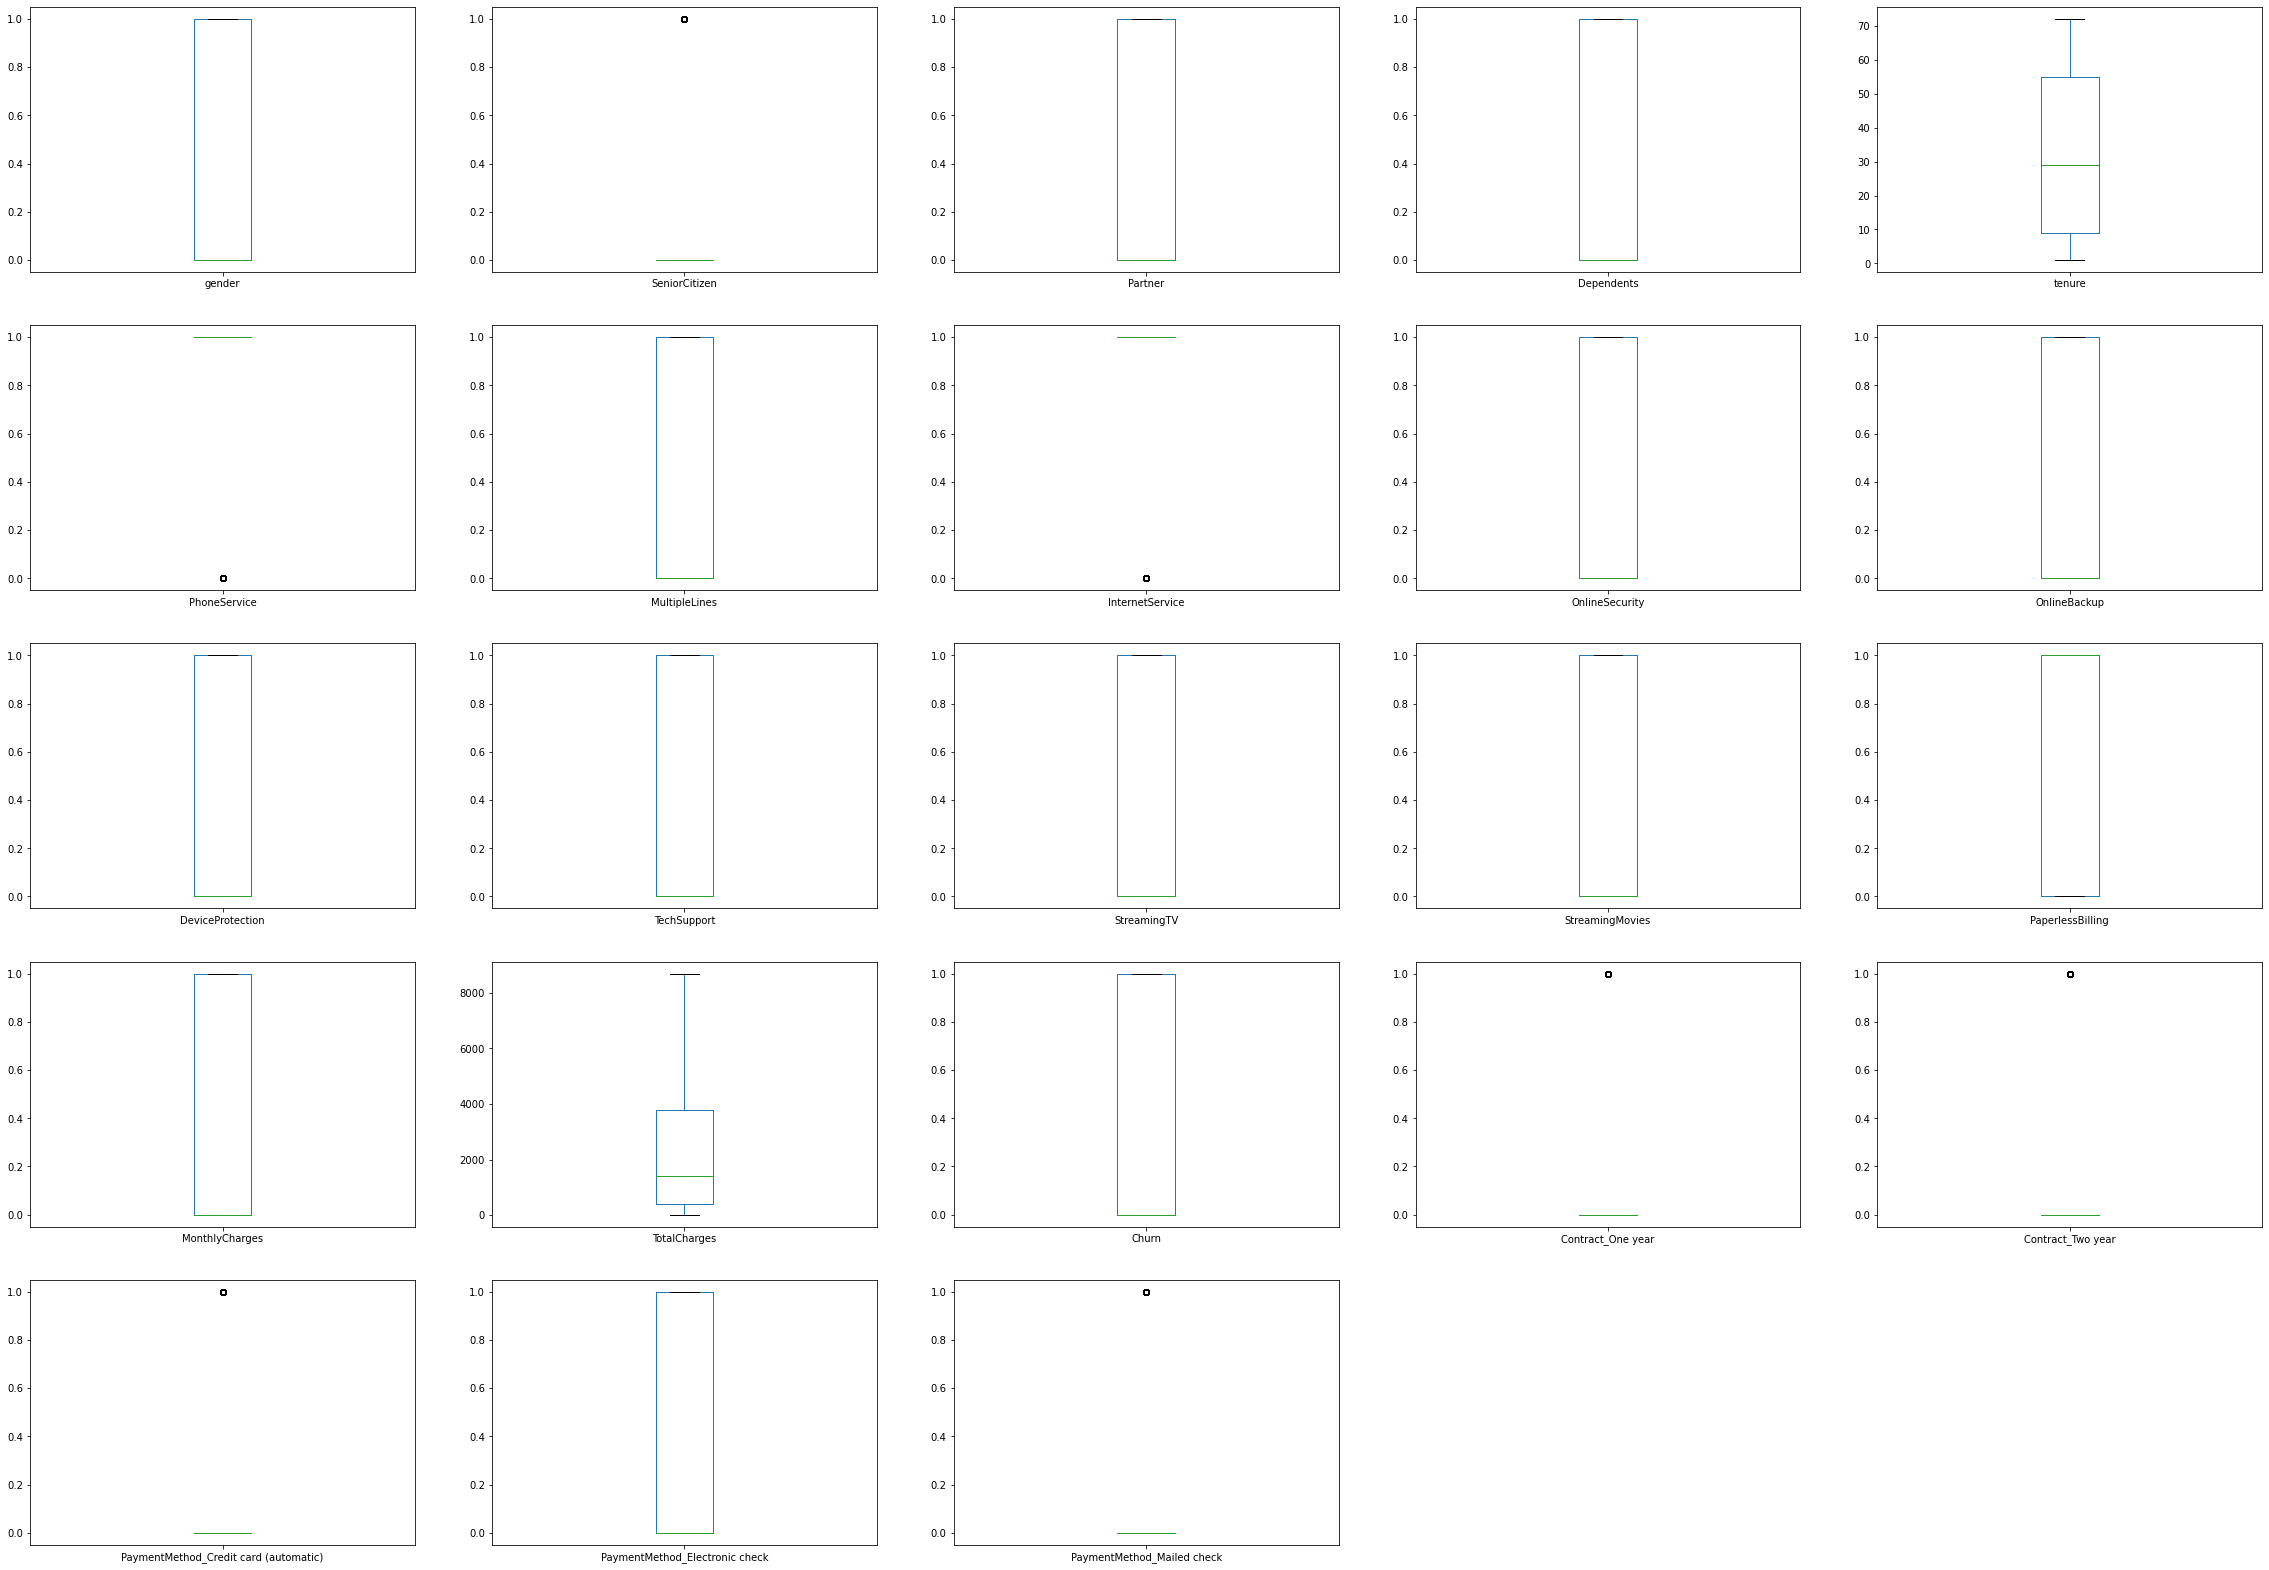

In [46]:
d.plot(kind="box",subplots=True,layout=(7,5),figsize=(40,40))

In [47]:
import numpy as np
import scipy
from scipy.stats import zscore
z=np.abs(zscore(d))
z

array([[1.00943013, 0.44032709, 1.03561683, ..., 0.5253508 , 1.40476387,
        0.54360352],
       [0.99065797, 0.44032709, 0.9656081 , ..., 0.5253508 , 0.71186341,
        1.83957601],
       [0.99065797, 0.44032709, 0.9656081 , ..., 0.5253508 , 0.71186341,
        1.83957601],
       ...,
       [1.00943013, 0.44032709, 1.03561683, ..., 0.5253508 , 1.40476387,
        0.54360352],
       [0.99065797, 2.27103902, 1.03561683, ..., 0.5253508 , 0.71186341,
        1.83957601],
       [0.99065797, 0.44032709, 0.9656081 , ..., 0.5253508 , 0.71186341,
        0.54360352]])

In [48]:
d2=d[(z<3).all(axis=1)]
d2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,0,0,0,0,34,1,0,1,1,0,...,0,0,0.0,1889.50,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,1,...,0,1,0.0,108.15,1,0,0,0,0,1
4,1,0,0,0,2,1,0,1,0,0,...,0,1,1.0,151.65,1,0,0,0,1,0
5,1,0,0,0,8,1,1,1,0,0,...,1,1,1.0,820.50,1,0,0,0,1,0
6,0,0,0,1,22,1,1,1,0,1,...,0,1,0.0,1949.40,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1,0,0,0,72,1,0,0,0,0,...,0,1,1.0,1419.40,0,0,1,0,0,0
7038,0,0,1,1,24,1,1,1,1,0,...,1,1,0.0,1990.50,0,1,0,0,0,1
7039,1,0,1,1,72,1,1,1,0,1,...,1,1,1.0,7362.90,0,1,0,1,0,0
7041,0,1,1,0,4,1,1,1,0,0,...,0,1,0.0,306.60,1,0,0,0,0,1


In [49]:
d.shape

(7032, 23)

In [50]:
d2.shape

(6352, 23)

# dividing data in features and vectors-

In [51]:
x=d2.drop(["Churn"],axis=1)
y=d2['Churn']

In [52]:
y.head()

1    0
2    1
4    1
5    1
6    0
Name: Churn, dtype: int64

In [53]:
y.shape

(6352,)

# Testing on various models

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [58]:
#selecting the best Random state
l=[]
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("at random state ",i,"the model performs very well")
        print("at random state:",i)
        print("training accuracy score:",accuracy_score(y_train,pred_train)*100)
        print("testing accuracy score:",accuracy_score(y_test,pred_test)*100)
        l.append(i)




at random state  0 the model performs very well
at random state: 0
training accuracy score: 80.7990599294947
testing accuracy score: 78.826895565093
at random state  1 the model performs very well
at random state: 1
training accuracy score: 80.32902467685076
testing accuracy score: 79.58989031950405
at random state  2 the model performs very well
at random state: 2
training accuracy score: 79.36545240893066
testing accuracy score: 79.25608011444922
at random state  3 the model performs very well
at random state: 3
training accuracy score: 79.78848413631022
testing accuracy score: 81.0205054840248
at random state  4 the model performs very well
at random state: 4
training accuracy score: 79.62397179788483
testing accuracy score: 81.0205054840248
at random state  5 the model performs very well
at random state: 5
training accuracy score: 80.18801410105758
testing accuracy score: 79.39914163090128
at random state  6 the model performs very well
at random state: 6
training accuracy score: 7

at random state  54 the model performs very well
at random state: 54
training accuracy score: 80.0
testing accuracy score: 80.25751072961373
at random state  55 the model performs very well
at random state: 55
training accuracy score: 79.57696827262045
testing accuracy score: 81.11587982832617
at random state  56 the model performs very well
at random state: 56
training accuracy score: 80.37602820211515
testing accuracy score: 79.3037672865999
at random state  57 the model performs very well
at random state: 57
training accuracy score: 80.32902467685076
testing accuracy score: 80.4959465903672
at random state  58 the model performs very well
at random state: 58
training accuracy score: 80.16451233842538
testing accuracy score: 78.77920839294231
at random state  59 the model performs very well
at random state: 59
training accuracy score: 80.75205640423032
testing accuracy score: 78.11158798283262
at random state  60 the model performs very well
at random state: 60
training accuracy scor

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
mnb=MultinomialNB()
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()

In [60]:
model=[lg,dtc,mnb,svc]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of",m,"is")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is
0.7849308536003815
[[1370  148]
 [ 303  276]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1518
           1       0.65      0.48      0.55       579

    accuracy                           0.78      2097
   macro avg       0.73      0.69      0.70      2097
weighted avg       0.77      0.78      0.77      2097



Accuracy score of DecisionTreeClassifier() is
0.7143538388173581
[[1217  301]
 [ 298  281]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1518
           1       0.48      0.49      0.48       579

    accuracy                           0.71      2097
   macro avg       0.64      0.64      0.64      2097
weighted avg       0.71      0.71      0.71      2097



Accuracy score of MultinomialNB() is
0.7458273724368145
[[1162  356]
 [ 177  402]]
              precision    recall  f1-score   support

           0       0.87 

In [61]:
#predicting the value
pred=lg.predict(x_test)
print("Churn",pred)

Churn [0 0 1 ... 0 0 1]


In [62]:
dfr1=pd.DataFrame({"Actual Churn":y_test,"Predicted Churn":pred})
dfr1

,Actual Churn,Predicted Churn
1702,1,0
4127,0,0
2422,0,1
5752,0,0
5912,1,0
...,...,...
3320,0,0
5441,1,0
1865,0,0
5918,0,0


# AUC and ROC curve

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [64]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([4.78064059e-01, 1.92852538e-03, 7.66164583e-01, ...,
       4.78947881e-01, 4.32721461e-04, 7.13035648e-01])

In [65]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

In [66]:
#false positive rate
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.58761528e-04,
       6.58761528e-04, 1.97628458e-03, 1.97628458e-03, 2.63504611e-03,
       2.63504611e-03, 3.29380764e-03, 3.29380764e-03, 3.95256917e-03,
       3.95256917e-03, 4.61133070e-03, 4.61133070e-03, 5.27009223e-03,
       5.27009223e-03, 6.58761528e-03, 6.58761528e-03, 7.24637681e-03,
       7.24637681e-03, 8.56389987e-03, 8.56389987e-03, 9.22266140e-03,
       9.22266140e-03, 9.88142292e-03, 9.88142292e-03, 1.18577075e-02,
       1.18577075e-02, 1.25164690e-02, 1.25164690e-02, 1.31752306e-02,
       1.31752306e-02, 1.38339921e-02, 1.38339921e-02, 1.44927536e-02,
       1.44927536e-02, 1.51515152e-02, 1.51515152e-02, 1.58102767e-02,
       1.58102767e-02, 1.64690382e-02, 1.64690382e-02, 1.77865613e-02,
       1.77865613e-02, 1.84453228e-02, 1.84453228e-02, 1.91040843e-02,
       1.91040843e-02, 1.97628458e-02, 1.97628458e-02, 2.04216074e-02,
       2.04216074e-02, 2.17391304e-02, 2.17391304e-02, 2.23978920e-02,
      

In [67]:
#true positive rate
tpr

array([0.        , 0.00172712, 0.01208981, 0.01208981, 0.02936097,
       0.02936097, 0.0328152 , 0.0328152 , 0.04145078, 0.04145078,
       0.04663212, 0.04663212, 0.05008636, 0.05008636, 0.05872193,
       0.05872193, 0.0656304 , 0.0656304 , 0.07599309, 0.07599309,
       0.07772021, 0.07772021, 0.10880829, 0.10880829, 0.11398964,
       0.11398964, 0.11571675, 0.11571675, 0.13644214, 0.13644214,
       0.13816926, 0.13816926, 0.14162349, 0.14162349, 0.14507772,
       0.14507772, 0.15198618, 0.15198618, 0.15544041, 0.15544041,
       0.15889465, 0.15889465, 0.16407599, 0.16407599, 0.17098446,
       0.17098446, 0.17271157, 0.17443869, 0.17962003, 0.17962003,
       0.18307427, 0.18307427, 0.18825561, 0.18825561, 0.18998273,
       0.18998273, 0.19516408, 0.19516408, 0.19861831, 0.19861831,
       0.20034542, 0.20034542, 0.20379965, 0.20379965, 0.208981  ,
       0.208981  , 0.21070812, 0.21070812, 0.21416235, 0.21416235,
       0.2193437 , 0.2193437 , 0.22107081, 0.22107081, 0.22625

In [68]:
threshold

array([1.85853397e+00, 8.58533968e-01, 8.25982805e-01, 8.25711975e-01,
       7.95744585e-01, 7.92957453e-01, 7.89771784e-01, 7.88974734e-01,
       7.82256800e-01, 7.80090199e-01, 7.76941816e-01, 7.75657177e-01,
       7.74765840e-01, 7.74144990e-01, 7.70011369e-01, 7.66164583e-01,
       7.63234480e-01, 7.60528131e-01, 7.59315697e-01, 7.58942126e-01,
       7.58689713e-01, 7.57309647e-01, 7.44634237e-01, 7.44496022e-01,
       7.43249228e-01, 7.43083435e-01, 7.43071492e-01, 7.42225256e-01,
       7.31526554e-01, 7.30679960e-01, 7.28611404e-01, 7.27651591e-01,
       7.25828490e-01, 7.24057457e-01, 7.22235863e-01, 7.22072399e-01,
       7.19181267e-01, 7.17936520e-01, 7.14813755e-01, 7.13035648e-01,
       7.12469789e-01, 7.11323338e-01, 7.05647564e-01, 7.04370663e-01,
       7.01762723e-01, 7.01741731e-01, 7.00277724e-01, 7.00249492e-01,
       7.00183612e-01, 6.98729427e-01, 6.97479549e-01, 6.97264662e-01,
       6.95655938e-01, 6.95494543e-01, 6.95143104e-01, 6.94116024e-01,
      

<function matplotlib.pyplot.show(close=None, block=None)>

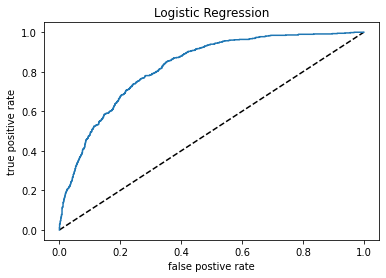

In [69]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("false postive rate")
plt.ylabel("true positive rate")
plt.title("Logistic Regression")
plt.show

In [70]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

0.6895936158157379


# K fold cross validation

In [71]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80723839 0.7804878  0.8015748  0.79370079 0.80393701]
0.7973877596535681
0.009556790646688513


In [72]:
list1=[lg,dtc,mnb,svc]
for l in list1:
    score=cross_val_score(l,x,y,cv=5)
    print("accuracy score of model",l,"is",score)
    print(score.mean())
    print(score.std())
    print('\n')

accuracy score of model LogisticRegression() is [0.80723839 0.7804878  0.8015748  0.79370079 0.80393701]
0.7973877596535681
0.009556790646688513


accuracy score of model DecisionTreeClassifier() is [0.71203777 0.73721479 0.71811024 0.71889764 0.73622047]
0.7244961806996785
0.010262145540339487


accuracy score of model MultinomialNB() is [0.76632573 0.75767113 0.75590551 0.77322835 0.76220472]
0.763067087109784
0.006245288891722575


accuracy score of model SVC() is [0.7324941  0.7324941  0.73307087 0.73228346 0.73228346]
0.7325251987089341
0.00028863752531275516




# saving the best model

1st method- from joblib 

In [73]:
import joblib
#serialisation(dump)- saving the model as a object file
joblib.dump(lg,"customerchurnanalysisPred.obj")


#deserialisation(load)- loading the model
lg_from_joblib=joblib.load("customerchurnanalysisPred.obj")


#using the loaded model for prediction
lg_from_joblib.predict(x_test)

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

2nd method from pickle

In [74]:
import pickle
filename= "customerchurn.pkl"
pickle.dump(dtc, open(filename,'wb'))

#load model from disk
load= pickle.load(open(filename,'rb'))

load.predict(x_test)

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [75]:
from sklearn.model_selection import GridSearchCV

parameter={"criterion":['gini','entropy'],
          'splitter':['best', 'random'],
          'max_depth': np.arange(2,10),
          'max_features':["auto",'sqrt','log2']}

In [76]:
GVC=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [77]:
GVC.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'best'}

# taking best parameters into the final model

In [78]:
finalmod= DecisionTreeClassifier(criterion='gini',max_depth=5,max_features="sqrt",splitter="best")
finalmod.fit(x_train,y_train)
score=finalmod.score(x_train,y_train)
fpred=finalmod.predict(x_test)

accuscore=accuracy_score(y_test,fpred)
con=confusion_matrix(y_test,fpred)
cr=classification_report(y_test,pred)

print("model score is:",score)
print("accuracy score is:",accuscore)

model score is: 0.7898942420681551
accuracy score is: 0.7610872675250357
